# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import flatiron_stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
#Your code here
df = pd.read_csv('multipleChoiceResponses_cleaned.csv', encoding = 'latin1')
df.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26394 entries, 0 to 26393
Columns: 230 entries, GenderSelect to AdjustedCompensation
dtypes: float64(15), object(215)
memory usage: 46.3+ MB


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [16]:
# H0 = no difference in salaries between students with Masters and those with Bachelors.
# H1 = statistical difference in salaries between students with Masters and those with Bachelors.

In [24]:
# Define dataframes for Bachelors Degree and Masters degree
BDMD = data[(data['FormalEducation'] == "Bachelor's degree") | (data['FormalEducation'] == "Master's degree") ]
BDMD.head()

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
1,Master's degree,NaN
2,Master's degree,NaN
3,Master's degree,250000.0
6,Master's degree,NaN


In [41]:
# Remove null values
BDMD = BDMD.dropna()
BDMD

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.000
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
14,Master's degree,36634.400
...,...,...
26180,Master's degree,65770.430
26185,Bachelor's degree,50000.000
26195,Bachelor's degree,100449.384
26255,Master's degree,89686.950


In [43]:
# Remove 0 on basis that it is also null value
BDMD = BDMD[BDMD['AdjustedCompensation'] != 0]
BDMD

,FormalEducation,AdjustedCompensation
3,Master's degree,250000.000
8,Bachelor's degree,64184.800
9,Bachelor's degree,20882.400
11,Bachelor's degree,1483.900
14,Master's degree,36634.400
...,...,...
26180,Master's degree,65770.430
26185,Bachelor's degree,50000.000
26195,Bachelor's degree,100449.384
26255,Master's degree,89686.950


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

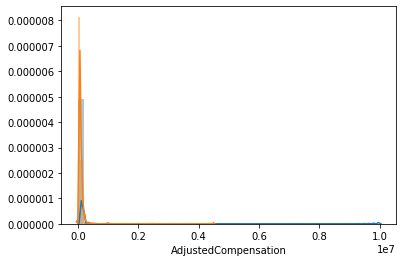

In [54]:
#Your code here

bd = "Bachelor's degree"
md = "Master's degree"
fe = "FormalEducation"
ac = "AdjustedCompensation"

plot1 = BDMD[BDMD[fe] == bd][ac]
plot2 = BDMD[BDMD[fe] == md][ac]
sns.distplot(plot1)
sns.distplot(plot2)
plt.show()

In [56]:
# Define our two samples
b = BDMD[BDMD[fe] == bd][ac]
m = BDMD[BDMD[fe] == md][ac]

In [58]:
# Run Welch T Test
flatiron_stats.welch_t(b,m)

0.46177351618704626

In [59]:
flatiron_stats.welch_df(b,m)

1341.3320202198183

In [64]:
flatiron_stats.p_value_welch_ttest(b, m, two_sided=False)

0.3221593124062694

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [65]:
df['FormalEducation'].value_counts()

Master's degree                                                      8204
Bachelor's degree                                                    4811
Doctoral degree                                                      3543
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

In [67]:
BDDD = data[(data['FormalEducation'] == "Bachelor's degree") | (data['FormalEducation'] == "Doctoral degree") ]
BDDD.head()

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
4,Doctoral degree,NaN
5,Doctoral degree,NaN
7,Bachelor's degree,NaN
8,Bachelor's degree,64184.8


In [70]:
# Remove null values
BDDD = BDDD.dropna()

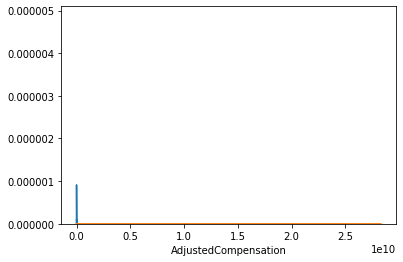

In [72]:
bd = "Bachelor's degree"
dd = "Doctoral degree"
fe = "FormalEducation"
ac = "AdjustedCompensation"

plot1 = BDDD[BDDD[fe] == bd][ac]
plot2 = BDDD[BDDD[fe] == dd][ac]
sns.distplot(plot1)
sns.distplot(plot2)
plt.show()

In [74]:
# Define our two samples
s1 = BDDD[BDDD[fe] == bd][ac]
s2 = BDDD[BDDD[fe] == dd][ac]

In [77]:
print('Median Values:')
print(f's1: {round(s1.median(),2)}')
print(f's2: {round(s2.median(),2)}')
print('Sample sizes:')
print(f's1: {len(s1)}')
print(f's2: {len(s2)}')

Median Values:
s1: 38399.4
s2: 74131.92
Sample sizes:
s1: 1107
s2: 967


In [79]:
# Run Welch T Test
flatiron_stats.welch_t(s1,s2)
flatiron_stats.welch_df(s1,s2)
p_val = flatiron_stats.p_value_welch_ttest(s1, s2, two_sided=False)
print(f"Welch's t-test p-value: {p_val}")

Welch's t-test p-value: 0.15682381994720251


In [92]:
# investigate outliers
print(np.quantile(s1, 0.99))
print(np.quantile(s2, 0.99))

250000.0
336800.00000000064


In [94]:
# choose to remove above $350k
s1 = BDDD[ (BDDD[fe] == bd) & (BDDD[ac] < 350000)][ac]
s2 = BDDD[ (BDDD[fe] == dd) & (BDDD[ac] < 350000)][ac]

In [98]:
print('Median Values - no outliers:')
print(f's1: {round(s1.median(),2)}')
print(f's2: {round(s2.median(),2)}')
print('Sample sizes - no outliers:')
print(f's1: {len(s1)}')
print(f's2: {len(s2)}')

Median Values - no outliers:
s1: 37766.88
s2: 72830.34
Sample sizes - no outliers:
s1: 1098
s2: 957


In [97]:
# Run Welch T Test
flatiron_stats.welch_t(s1,s2)
flatiron_stats.welch_df(s1,s2)
p_val = flatiron_stats.p_value_welch_ttest(s1, s2, two_sided=False)
print(f"Welch's t-test p-value - no outliers: {p_val}")

Welch's t-test p-value - no outliers: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [101]:
#Your code here
data = df [['FormalEducation', 'AdjustedCompensation']]
data.head()

,FormalEducation,AdjustedCompensation
0,Bachelor's degree,NaN
1,Master's degree,NaN
2,Master's degree,NaN
3,Master's degree,250000.0
4,Doctoral degree,NaN


In [103]:
# Remove null values
data = data.dropna()

In [104]:
# Come back to ANOVA once done linear regression

## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!